# Austin Hoang
# Project 5 
# Prof. Avery, CPSC 483
# 4/22/2021

### This project examines three datasets and scores them using score, Gaussian Naive Bayes, and K-Nearest Neighbors and plotting their respective scatterplots and decision boundaries.

#### 1. Loading and examining each dataset

In [1]:
import pandas as pd
d1 = pd.read_csv('dataset1.csv', header = None)
d1.columns = ["x1", "x2", "t"]
d1.head()

,x1,x2,t
0,1.800539,-0.539218,0
1,24.330831,26.439146,1
2,21.124114,21.166814,1
3,10.517197,11.175424,0
4,19.737721,23.341138,1


In [2]:
d2 = pd.read_csv('dataset2.csv', header = None)
d2.columns = ["x1", "x2", "t"]
d2.head()

,x1,x2,t
0,-1.664407,17.245415,0
1,20.211237,8.599145,1
2,12.675218,23.148375,1
3,17.552831,10.311698,1
4,14.959941,20.225844,1


In [3]:
d3 = pd.read_csv('dataset3.csv', header = None)
d3.columns = ["x1", "x2", "t"]
d3.head()

,x1,x2,t
0,30.876149,7.806793,0
1,34.060953,14.802478,0
2,30.860440,16.270849,0
3,21.738646,10.306756,1
4,17.664476,30.921761,1


#### 2. Since the score is 1, the model's predictions are accurate

In [4]:
from sklearn.linear_model import LogisticRegression
d1_cols12 = d1.iloc[:, 0:2]
d1_col3 = d1.iloc[:,2]
reg_d1 = LogisticRegression().fit(d1_cols12, d1_col3)
reg_d1.score(d1_cols12, d1_col3)
# 1 is best

1.0

#### 3. The score is 0.525, which is not as accurate.

In [5]:
d2_cols12 = d2.iloc[:, 0:2]
d2_col3 = d2.iloc[:,2]
reg_d2 = LogisticRegression().fit(d2_cols12, d2_col3)
reg_d2.score(d2_cols12, d2_col3)
# 2 not as good as previous

0.525

#### 4. The discrepency comes from how the datapoints are clustered. Dataset 1 has a more dense grouping and are more distinct compared to dataset 2, where it looks like there is no clear-cut boundary and the datapoints are more scattered.

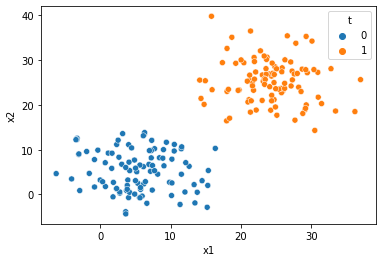

<AxesSubplot:xlabel='x1', ylabel='x2'>

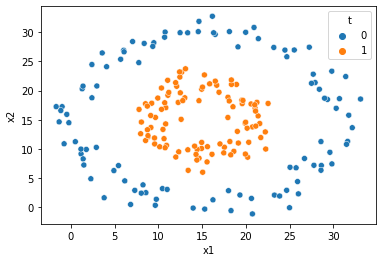

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x="x1", y="x2", hue='t', data=d1)
plt.show()
sns.scatterplot(x="x1", y="x2", hue='t', data=d2)
# dataset 1 has a more clear distinction between clusters compared to dataset 2.

#### 5. Using GNB, the classifiers both scored 1, which is the best.

In [7]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
print("GNB score dataset 1: " + str(gnb.fit(d1_cols12, d1_col3).score(d1_cols12, d1_col3)))
print("GNB score dataset 2: " + str(gnb.fit(d2_cols12, d2_col3).score(d2_cols12, d2_col3)))

GNB score dataset 1: 1.0
GNB score dataset 2: 1.0


#### 6. Using KNN to fit and score, with both datasets scoring 1.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
print("K-Nearest Neighbor score dataset 1: " + str(neigh.fit(d1_cols12, d1_col3).score(d1_cols12,d1_col3)))
print("K-Nearest Neighbor score dataset 2: " + str(neigh.fit(d2_cols12, d2_col3).score(d2_cols12,d2_col3)))

K-Nearest Neighbor score dataset 1: 1.0
K-Nearest Neighbor score dataset 2: 1.0


#### 7. A major difference we can see between these two decision boundaries are how the datapoints are seperated by the boundaries. In dataset 1, we can see a clear distinction between the two different classifiers, while in dataset 2 we see the datapoints start to heavily intrude into each other's classifier boundaries.

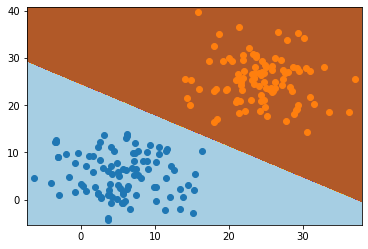

In [9]:
import numpy as np
X = pd.read_csv('dataset1.csv').iloc[:, 0:2].to_numpy()
y = pd.read_csv('dataset1.csv').iloc[:,2].to_numpy()

# define bounds of the domain
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1

# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# define the model
model = LogisticRegression()

# fit the model
model.fit(X, y)
# make predictions for the grid
yhat = model.predict(grid)
# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')
# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y == class_value)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')
# dataset 1 has a distinct seperation of each classifier in the dataset

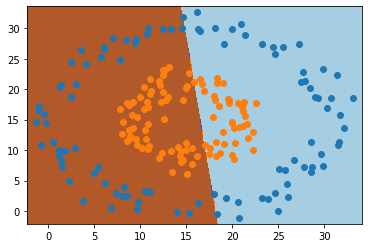

In [10]:
import numpy as np
X = pd.read_csv('dataset2.csv').iloc[:, 0:2].to_numpy()
y = pd.read_csv('dataset2.csv').iloc[:,2].to_numpy()

# define bounds of the domain
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1

# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# define the model
model = LogisticRegression()

# fit the model
model.fit(X, y)
# make predictions for the grid
yhat = model.predict(grid)
# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')
# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y == class_value)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')
# dataset 2 is split where both points are mixed in each colored section

#### 8. In dataset 3 we can see that using the score() method returns the least accurate score, while GNB and KNN give higher ones, with KNN being the highest. In terms of decision boundaries, dataset 3 displays similar behavior in 2, but not as extreme. The datapoints in 3 bleed into the other's boundary but not by much.

dataset 3 score: 0.475
GNB score dataset 3: 0.885
K-Nearest Neighbor score dataset 3: 1.0


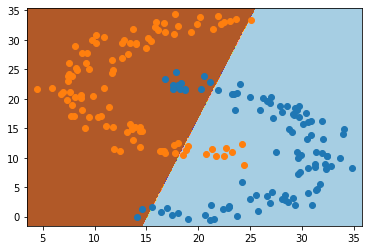

In [11]:
d3_cols12 = d3.iloc[:, 0:2]
d3_col3 = d3.iloc[:,2]
reg_d3 = LogisticRegression().fit(d3_cols12, d3_col3)
print("dataset 3 score: " + str(reg_d3.score(d2_cols12, d3_col3)))
print("GNB score dataset 3: " + str(gnb.fit(d3_cols12, d3_col3).score(d3_cols12, d3_col3)))
print("K-Nearest Neighbor score dataset 3: " + str(neigh.fit(d3_cols12, d3_col3).score(d3_cols12,d3_col3)))

X_3 = pd.read_csv('dataset3.csv').iloc[:, 0:2].to_numpy()
y_3 = pd.read_csv('dataset3.csv').iloc[:,2].to_numpy()
# define bounds of the domain
min1, max1 = X_3[:, 0].min()-1, X_3[:, 0].max()+1
min2, max2 = X_3[:, 1].min()-1, X_3[:, 1].max()+1
# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))
# define the model
model = LogisticRegression()
# fit the model
model.fit(X_3, y_3)
# make predictions for the grid
yhat = model.predict(grid)
# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')
# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y_3 == class_value)
    # create scatter of these samples
    plt.scatter(X_3[row_ix, 0], X_3[row_ix, 1], cmap='Paired')
# dataset 3 has the highest score with KNN, GNB is next best and score is worst. decision boundary
# is somewhat similar to 2, where some of the points go over their boundary